# 출처

- https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
- https://www.kaggle.com/lsjsj92/simple-titanic-kernel-82-for-beginner-like-me
- https://www.kaggle.com/startupsci/titanic-data-science-solutions
- https://www.kaggle.com/ash316/eda-to-prediction-dietanic
- https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-with-python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('../datas/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
print("age null값 비율 : {0:.3f}".format((data['Age'].isna().sum() / len(data)) * 100))
print("cabin null값 비율 : {0:.3f}".format((data['Cabin'].isna().sum() / len(data)) * 100 ))

age null값 비율 : 19.865
cabin null값 비율 : 77.104


In [13]:
data['Embarked'].fillna('S', inplace = True)
data['Fare'].fillna(0, inplace=True)
data['Fare'] = data['Fare'].map(lambda x : np.log(x) if x > 0 else 0)

In [14]:
data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')
data['Initial'].data(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)
mapping = {
    "Mr":0,
    "Miss":1,
    "Mrs" : 1,
    "Master":2,
    "Other":3
}

data['Initial'] = data['Initial'].map(mapping)


In [15]:
mapping_sex = {
    'male' : 0,
    'female': 1
}

mapping_em = {
    'S' :0,
    'C' :1,
    'Q' :2
}


data['Sex'] = data['Sex'].map(mapping_sex)
data['Embarked'] = data['Embarked'].map(mapping_em)


data.drop(['PassengerId', "Ticket", "Cabin", "Name"], axis = 1, inplace = True)


In [16]:
data.groupby('Initial')['Age'].mean()

Initial
0    32.739609
1    27.834615
2     4.574167
3    45.888889
Name: Age, dtype: float64

In [17]:
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 0), 'Age' ] = 32
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 1), 'Age' ] = 28
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 2), 'Age' ] = 5
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 3), 'Age' ] = 45

In [18]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,0,22.0,1,0,1.981001,0,0
1,1,1,1,38.0,1,0,4.266662,1,1
2,1,3,1,26.0,0,0,2.070022,0,1
3,1,1,1,35.0,1,0,3.972177,0,1
4,0,3,0,35.0,0,0,2.085672,0,0


In [19]:
y = data['Survived']
X = data.drop('Survived', axis = 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [21]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

d:\anaconda3\envs\soojin\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
pred = rf.predict(X_test)
print("정확도 :{0:.3f}".format(accuracy_score(y_test, pred)))

정확도 :0.810


In [23]:
rf_param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [4, 6, 8, 10, 12],
    'min_samples_leaf' : [3, 5, 6, 7, 10],
    'min_samples_split' : [2, 3, 5, 7, 10]
}

In [24]:
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, scoring="accuracy", n_jobs= -1, verbose = 1)
rf_grid.fit(X_train, y_train)

d:\anaconda3\envs\soojin\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   16.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [25]:
print("최고 평균 정확도 : {0:.4f}".format(rf_grid.best_score_))
print("최고의 파라미터 : ", rf_grid.best_params_)

최고 평균 정확도 : 0.8174
최고의 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [26]:
result = pd.DataFrame(rf_grid.cv_results_)
result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [27]:
result.sort_values(by=['rank_test_score'], inplace=True)

In [28]:
result[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
32,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.817416,1
34,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.817416,1
36,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.817416,1
56,"{'max_depth': 8, 'min_samples_leaf': 10, 'min_...",0.814607,4
105,"{'max_depth': 12, 'min_samples_leaf': 5, 'min_...",0.814607,4
107,"{'max_depth': 12, 'min_samples_leaf': 5, 'min_...",0.814607,4
68,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.814607,4
66,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.814607,4
111,"{'max_depth': 12, 'min_samples_leaf': 5, 'min_...",0.814607,4
109,"{'max_depth': 12, 'min_samples_leaf': 5, 'min_...",0.814607,4


In [29]:
model = rf_grid.best_estimator_
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print("정확도 : {0:.4f}".format(acc))


정확도 : 0.8603


In [30]:
feature_importances = model.feature_importances_

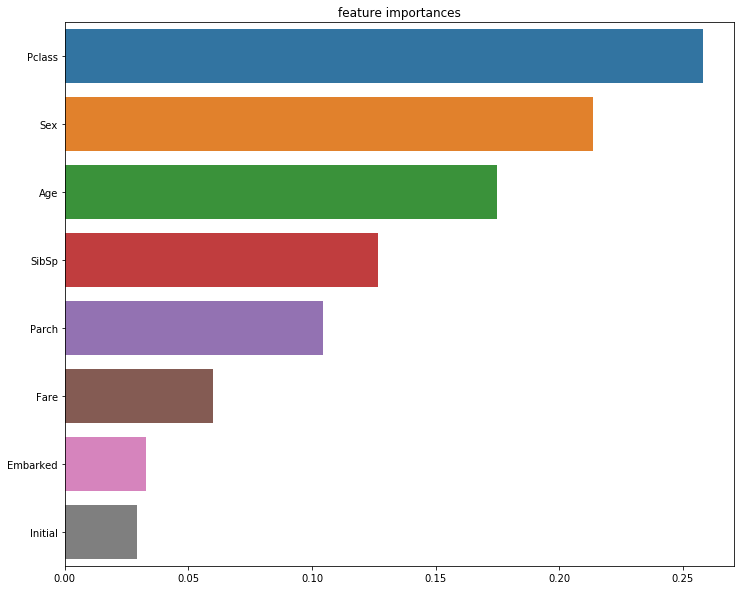

In [31]:
ft_importances = pd.Series(feature_importances, index = X_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.title("feature importances")
sns.barplot(x=ft_importances, y = X_train.columns)
plt.show()
